In [79]:
#!pip install beautifulsoup4 selenium webdriver-manager pandas

In [80]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import pandas as pd
from datetime import datetime
import os

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


In [ ]:
# Tarayƒ±cƒ± ayarlarƒ±

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time

# Tarayƒ±cƒ± ayarlarƒ± (CI i√ßin gerekli flagler eklendi)
options = Options()
options.add_argument("--headless=new")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")

# üîπ webdriver-manager ChromeDriver‚Äôƒ± otomatik indirir ve baƒülar
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# X.com login sayfasƒ±na git
url = "https://x.com/i/flow/login"
driver.get(url)

# Kullanƒ±cƒ± adƒ±
WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.NAME, "text"))
)
usernameInput = driver.find_element(By.NAME, "text")
usernameInput.send_keys("canergiden007")
usernameInput.send_keys(Keys.ENTER)
time.sleep(2)

# E-posta (opsiyonel doƒürulama)
try:
    email_field = WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.NAME, "text"))
    )
    email_field.send_keys("canergiden007@gmail.com")
    email_field.send_keys(Keys.ENTER)
    time.sleep(2)
except:
    pass

# ≈ûifre
password_field = WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.NAME, "password"))
)
password_field.send_keys("Canergiden007@")
password_field.send_keys(Keys.ENTER)
time.sleep(3)



"""
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# ChromeDriver'ƒ± ba≈ülatma
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url = 'https://x.com/i/flow/login'
driver.get(url)

# Kullanƒ±cƒ± adƒ± alanƒ±nƒ± bulup giri≈ü yapƒ±yoruz
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '/html/body/div/div/div/div[1]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[4]/label/div/div[2]/div/input')))
usernameInput = driver.find_element(By.XPATH, '/html/body/div/div/div/div[1]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[4]/label/div/div[2]/div/input')
usernameInput.send_keys("canergiden007")
time.sleep(1)
usernameInput.send_keys(Keys.ENTER)


# E-posta veya telefon numarasƒ± alanƒ±nƒ± bulup e-posta giriyoruz
try:
    email_field_locator = (By.XPATH, '/html/body/div/div/div/div[2]/main/div/div/div/div[2]/div[2]/div[1]/div/div/div[2]/label/div/div[2]/div/input')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located(email_field_locator))
    emailInput = driver.find_element(*email_field_locator)
except:
    email_field_locator = (By.CSS_SELECTOR, 'input[name="text"], input[placeholder="Telefon veya e-posta"]')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located(email_field_locator))
    emailInput = driver.find_element(*email_field_locator)

emailInput.send_keys("canergiden007@gmail.com")  
emailInput.send_keys(Keys.ENTER)
time.sleep(3)

# ≈ûifre alanƒ±nƒ±n y√ºklenmesini bekleyip ≈üifreyi giriyoruz
#password_field_locator = (By.XPATH, '/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
password_field_locator = (By.XPATH, '/html/body/div/div/div/div[1]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
WebDriverWait(driver, 10).until(EC.presence_of_element_located(password_field_locator))
passwordInput = driver.find_element(*password_field_locator)
passwordInput.send_keys('Canergiden007@')
passwordInput.send_keys(Keys.ENTER)

time.sleep(3)
"""

In [82]:
# Dosya ismini belirleme fonksiyonu 
def get_next_filename(prefix="blockchain_tweets"): 
    i = 1
    while os.path.exists(f"/Users/canergiden/Desktop/Pegos Model MVP/XVeriler/{prefix}{i}.csv"):
        i += 1
    return f"/Users/canergiden/Desktop/Pegos Model MVP/XVeriler/{prefix}{i}.csv"
    


In [83]:
keywords = ['blockchain', 'cryptocurrency', 'bitcoin',]

"""
keywords = ['blockchain', 'cryptocurrency', 'bitcoin', 'ethereum', 'NFT', 'smart contracts', 
            'DeFi', 'crypto', 'altcoin', 'web3', 'metaverse', 'stablecoin', 'token', 'mining', 'hashrate']
"""

for stock in keywords:
    url = 'https://x.com/search?q=' + stock
    driver.get(url)
    time.sleep(4)
    tweetArr = []
    scrollCount = 100
    for i in range(scrollCount):
        driver.execute_script("window.scrollBy(0, 1200);")
        time.sleep(2)
    
        htmlContent = driver.page_source
        soap = BeautifulSoup(htmlContent, 'html.parser')

        tweetBodies = soap.find_all('article')

        for tweetBody in tweetBodies:
            tweetObj = {}
            tweet = tweetBody.find(attrs={'data-testid': 'tweetText'})
            if tweet is not None:
                if tweet.text is not None:
                    timeElement = tweetBody.find('time')
                    try:
                        tweetTime = timeElement["datetime"]
                    except:
                        tweetTime = datetime.now()
                    tweetObj['tweet'] = tweet.text
                    interactionCountItems = tweetBody.find_all(attrs={'data-testid':'app-text-transition-container'})
                    for counter, interactionCount in enumerate(interactionCountItems):
                        result = interactionCount.text
                        if result != '':
                            if 'B' in result:
                                result = result.replace(' ', '').replace('B', '')
                                try:
                                    result = float(result)
                                    result = result * 1000
                                except:
                                    pass
                            elif 'Mn' in result:
                                result = result.replace(' ', '').replace('Mn', '')
                                try:
                                    result = float(result)
                                    result = result * 1000000
                                except:
                                    pass
                                
                        result = result if result != '' else 0
                        try:
                            result = int(result)
                        except:
                            pass

                        if counter == 0:
                            tweetObj['comment'] = result
                        elif counter == 1:
                            tweetObj['retweet'] = result
                        elif counter == 2:
                            tweetObj['like'] = result
                        elif counter == 3:
                            tweetObj['see_count'] = result
                    try:
                        tweetTime = datetime.fromisoformat(tweetTime[:-1])
                        tweetObj['time'] = tweetTime
                    except:
                        tweetObj['time'] = "-"

                    tweetObj['code'] = stock
                    tweetArr.append(tweetObj)

    df = pd.DataFrame(tweetArr)
    df.drop_duplicates()

    # Sƒ±radaki dosya ismini al
    file_name = get_next_filename()
    df.to_csv(file_name, index=False)
    print(f"Veriler '{file_name}' dosyasƒ±na ba≈üarƒ±yla kaydedildi.")
    time.sleep(75)

driver.quit()
print("ƒ∞≈ülem tamamlandƒ± ve driver kapatƒ±ldƒ±.")

Veriler '/Users/canergiden/Desktop/Pegos Model MVP/XVeriler/blockchain_tweets13.csv' dosyasƒ±na ba≈üarƒ±yla kaydedildi.
Veriler '/Users/canergiden/Desktop/Pegos Model MVP/XVeriler/blockchain_tweets14.csv' dosyasƒ±na ba≈üarƒ±yla kaydedildi.
Veriler '/Users/canergiden/Desktop/Pegos Model MVP/XVeriler/blockchain_tweets15.csv' dosyasƒ±na ba≈üarƒ±yla kaydedildi.
ƒ∞≈ülem tamamlandƒ± ve driver kapatƒ±ldƒ±.


In [84]:
import os
import pandas as pd
from glob import glob

In [85]:
# üìÇ CSV dosyalarƒ±nƒ±n olduƒüu klas√∂r
input_folder = "/Users/canergiden/Desktop/Pegos Model MVP/XVeriler"

# üìÇ Birle≈ütirilmi≈ü dosyanƒ±n kaydedileceƒüi yol
output_file = "/Users/canergiden/Desktop/Pegos Model MVP/Birle≈ütirilmis_CSV/Birle≈ütirilmis_CSV.csv"

# Klas√∂rdeki t√ºm CSV dosyalarƒ±nƒ±n yolunu al
csv_files = glob(os.path.join(input_folder, "*.csv"))

# Bo≈ü liste olu≈ütur
dataframes = []

# Her CSV dosyasƒ±nƒ± oku ve listeye ekle
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
        print(f"‚úÖ {os.path.basename(file)} eklendi.")
    except Exception as e:
        print(f"‚ö†Ô∏è {file} okunamadƒ±: {e}")

# CSV dosyalarƒ±nƒ± birle≈ütir
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_df.to_csv(output_file, index=False)
    print(f"\nüéâ T√ºm CSV dosyalarƒ± birle≈ütirildi ve '{output_file}' konumuna kaydedildi.")
else:
    print("‚ùå Hi√ß CSV dosyasƒ± bulunamadƒ±.")


‚úÖ blockchain_tweets5.csv eklendi.
‚úÖ blockchain_tweets14.csv eklendi.
‚úÖ blockchain_tweets15.csv eklendi.
‚úÖ blockchain_tweets4.csv eklendi.
‚úÖ blockchain_tweets6.csv eklendi.
‚úÖ blockchain_tweets7.csv eklendi.
‚úÖ blockchain_tweets3.csv eklendi.
‚úÖ blockchain_tweets12.csv eklendi.
‚úÖ blockchain_tweets13.csv eklendi.
‚úÖ blockchain_tweets2.csv eklendi.
‚úÖ blockchain_tweets11.csv eklendi.
‚úÖ blockchain_tweets10.csv eklendi.
‚úÖ blockchain_tweets1.csv eklendi.
‚úÖ blockchain_tweets9.csv eklendi.
‚úÖ blockchain_tweets8.csv eklendi.

üéâ T√ºm CSV dosyalarƒ± birle≈ütirildi ve '/Users/canergiden/Desktop/Pegos Model MVP/Birle≈ütirilmis_CSV/Birle≈ütirilmis_CSV.csv' konumuna kaydedildi.


In [86]:
import pandas as pd

# üìÇ Birle≈ütirilmi≈ü CSV dosyasƒ±nƒ±n yolu
file_path = '/Users/canergiden/Desktop/Pegos Model MVP/Birle≈ütirilmis_CSV/Birle≈ütirilmis_CSV.csv'

# CSV dosyasƒ±nƒ± oku
df = pd.read_csv(file_path)

# time s√ºtunundan g√ºn bilgisini √ßƒ±kar
df['day'] = pd.to_datetime(df['time']).dt.date

# Tekil g√ºnleri bul ve sƒ±rala
unique_days = df[['day']].drop_duplicates().sort_values(by='day')

# üìÇ √áƒ±ktƒ± dosya yolu
output_path = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweet_g√ºnleri.csv'

# CSV olarak kaydet
unique_days.to_csv(output_path, index=False)

print(f"‚úÖ Tekil g√ºnler listesi '{output_path}' konumuna kaydedildi.")


‚úÖ Tekil g√ºnler listesi '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweet_g√ºnleri.csv' konumuna kaydedildi.


In [87]:
import pandas as pd
import requests
from datetime import datetime, timedelta

# CoinGecko API URL'si
BASE_URL = "https://api.coingecko.com/api/v3/coins/bitcoin/history"

# üìÇ ƒ∞lk kodun √ºrettiƒüi "tweet_g√ºnleri.csv" dosya yolu
input_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweet_g√ºnleri.csv'

# Tarihleri oku
df = pd.read_csv(input_file)
dates = df['day'].tolist()

# Tarih formatƒ±nƒ± "dd-mm-yyyy" ≈üekline √ßevir
formatted_dates = [datetime.strptime(str(date), "%Y-%m-%d").strftime("%d-%m-%Y") for date in dates]

print(formatted_dates)


['05-08-2025', '06-08-2025', '07-08-2025', '08-08-2025', '09-08-2025', '10-08-2025', '11-08-2025', '12-08-2025', '13-08-2025', '14-08-2025', '16-08-2025', '17-08-2025', '18-08-2025', '19-08-2025', '20-08-2025', '21-08-2025']


In [88]:
import pandas as pd
import requests
import datetime
import csv

def get_binance_bitcoin_prices_on_date(date):
    """
    Belirli bir tarih i√ßin Binance API'sinden Bitcoin a√ßƒ±lƒ±≈ü ve kapanƒ±≈ü fiyatlarƒ±nƒ± √ßeker.
    :param date: "DD-MM-YYYY" formatƒ±nda tarih.
    :return: (a√ßƒ±lƒ±≈ü_fiyatƒ±, kapanƒ±≈ü_fiyatƒ±) veya ("Veri bulunamadƒ±!", "Veri bulunamadƒ±!")
    """
    base_url = "https://api.binance.com/api/v3/klines"
    symbol = "BTCUSDT"  # Bitcoin/USDT paritesi
    interval = "1d"     # G√ºnl√ºk veri

    # Tarihi Unix timestamp'e √ßevir
    dt = datetime.datetime.strptime(date, "%d-%m-%Y")
    start_time = int(dt.timestamp() * 1000)
    end_time = start_time + 86400000  # 1 g√ºn (ms)

    params = {
        "symbol": symbol,
        "interval": interval,
        "startTime": start_time,
        "endTime": end_time
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        if len(data) > 0:
            opening_price = float(data[0][1])  # A√ßƒ±lƒ±≈ü fiyatƒ±
            closing_price = float(data[0][4])  # Kapanƒ±≈ü fiyatƒ±
            return opening_price, closing_price
        else:
            return "Veri bulunamadƒ±!", "Veri bulunamadƒ±!"
    except Exception as e:
        return f"Hata: {str(e)}", f"Hata: {str(e)}"

# üìÇ tweet_g√ºnleri.csv dosyasƒ±nƒ± oku
tweet_days_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweet_g√ºnleri.csv'
df = pd.read_csv(tweet_days_file)

# Tarihleri formatla (YYYY-MM-DD ‚Üí DD-MM-YYYY)
dates = [datetime.datetime.strptime(str(date), "%Y-%m-%d").strftime("%d-%m-%Y") for date in df['day']]

# üìÇ √áƒ±ktƒ± dosya yolu
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_verileri.csv'

# CSV ba≈ülƒ±klarƒ±
headers = ["day", "bitcoin_open_price_usd", "bitcoin_close_price_usd"]

# Verileri CSV'ye yaz
with open(output_file, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(headers)

    for date in dates:
        open_price, close_price = get_binance_bitcoin_prices_on_date(date)
        writer.writerow([date, open_price, close_price])

print(f"‚úÖ Bitcoin fiyatlarƒ± '{output_file}' dosyasƒ±na yazƒ±ldƒ±.")


‚úÖ Bitcoin fiyatlarƒ± '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_verileri.csv' dosyasƒ±na yazƒ±ldƒ±.


In [89]:
import pandas as pd

# üìÇ Giri≈ü ve √ßƒ±kƒ±≈ü dosya yollarƒ±
input_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_verileri.csv'
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_fark.csv'

# CSV dosyasƒ±nƒ± oku
data = pd.read_csv(input_file, delimiter=',', header=0)

# S√ºtun adlarƒ±nƒ± d√ºzenle
data.rename(columns={
    'day': 'Tarih',
    'bitcoin_open_price_usd': 'A√ßƒ±lƒ±≈ü Fiyatƒ± (USD)',
    'bitcoin_close_price_usd': 'Kapanƒ±≈ü Fiyatƒ± (USD)'
}, inplace=True)

# Fark s√ºtununu ekle (Kapanƒ±≈ü - A√ßƒ±lƒ±≈ü)
data['Fark (USD)'] = data['Kapanƒ±≈ü Fiyatƒ± (USD)'] - data['A√ßƒ±lƒ±≈ü Fiyatƒ± (USD)']

# Yeni CSV olarak kaydet
data.to_csv(output_file, index=False)

print(f"‚úÖ Yeni dosya olu≈üturuldu: {output_file}")


‚úÖ Yeni dosya olu≈üturuldu: /Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_fark.csv


In [90]:
import pandas as pd

# üìÇ Orijinal dosya yolu (birle≈ütirilmi≈ü CSV)
file_path = '/Users/canergiden/Desktop/Pegos Model MVP/Birle≈ütirilmis_CSV/Birle≈ütirilmis_CSV.csv'

# CSV dosyasƒ±nƒ± oku
df = pd.read_csv(file_path)

# 'time' s√ºtununu "dd-mm-yyyy" formatƒ±na √ßevir
df['time'] = pd.to_datetime(df['time']).dt.strftime('%d-%m-%Y')

# üìÇ G√ºncellenmi≈ü dosya yolu
updated_file_path = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/blockchain_tweets_tarih_guncelleme.csv'

# Yeni dosyayƒ± kaydet
df.to_csv(updated_file_path, index=False)

print(f"‚úÖ G√ºncellenmi≈ü dosya '{updated_file_path}' olarak kaydedildi.")


‚úÖ G√ºncellenmi≈ü dosya '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/blockchain_tweets_tarih_guncelleme.csv' olarak kaydedildi.


In [91]:
import pandas as pd

# üìÇ Dosya yollarƒ±
tweets_file = "/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/blockchain_tweets_tarih_guncelleme.csv"
bitcoin_file = "/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/bitcoin_fark.csv"
output_file = "/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweets_bitcoin_birlestirilmis.csv"

# CSV dosyalarƒ±nƒ± y√ºkle
tweets_df = pd.read_csv(tweets_file)
bitcoin_df = pd.read_csv(bitcoin_file)

# Tarih formatlarƒ±nƒ± e≈üitle
bitcoin_df['Tarih'] = pd.to_datetime(bitcoin_df['Tarih'], dayfirst=True)
tweets_df['time'] = pd.to_datetime(tweets_df['time'], dayfirst=True)

# ƒ∞ki dosyayƒ± tarihe g√∂re birle≈ütir
tweets_merged_df = tweets_df.merge(bitcoin_df, left_on='time', right_on='Tarih', how='left')

# Gereksiz s√ºtunu kaldƒ±r
tweets_merged_df.drop(columns=['Tarih'], inplace=True)

# Sonucu kaydet
tweets_merged_df.to_csv(output_file, index=False)

print(f"‚úÖ Birle≈ütirilmi≈ü veri '{output_file}' konumuna kaydedildi.")


‚úÖ Birle≈ütirilmi≈ü veri '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweets_bitcoin_birlestirilmis.csv' konumuna kaydedildi.


In [92]:
import pandas as pd

# üìÇ Giri≈ü ve √ßƒ±kƒ±≈ü dosya yollarƒ±
input_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/tweets_bitcoin_birlestirilmis.csv'
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/son_d√ºzenlenmis_veriler.csv'

# CSV dosyasƒ±nƒ± y√ºkle
df = pd.read_csv(input_file)

# Kaldƒ±rƒ±lacak s√ºtunlar
silinecek_sutunlar = ['code']  # ƒ∞stersen buraya ba≈üka s√ºtunlar da ekleyebilirsin

# Belirtilen s√ºtunlarƒ± kaldƒ±r
df_cleaned = df.drop(columns=silinecek_sutunlar, errors='ignore')

# Temizlenmi≈ü tabloyu kaydet
df_cleaned.to_csv(output_file, index=False)

print(f"‚úÖ Temizlenmi≈ü dosya kaydedildi: {output_file}")


‚úÖ Temizlenmi≈ü dosya kaydedildi: /Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/son_d√ºzenlenmis_veriler.csv


In [93]:
import pandas as pd

# üìÇ Giri≈ü ve √ßƒ±kƒ±≈ü dosya yollarƒ±
input_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/son_d√ºzenlenmis_veriler.csv'
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/etiketli_veriler.csv'

# CSV dosyasƒ±nƒ± y√ºkle
df = pd.read_csv(input_file)

# 'Fark (USD)' s√ºtununa g√∂re target etiketi ekle
df['target'] = df['Fark (USD)'].apply(lambda x: 1 if x > 0 else 0)

# Yeni CSV olarak kaydet
df.to_csv(output_file, index=False)

print(f"‚úÖ Etiketli veri kaydedildi: {output_file}")


‚úÖ Etiketli veri kaydedildi: /Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/etiketli_veriler.csv


In [94]:
import pandas as pd

# üìÇ Giri≈ü ve √ßƒ±kƒ±≈ü dosya yollarƒ±
input_file = '/Users/canergiden/Desktop/Pegos Model MVP/D√ºzenleme_CSV/etiketli_veriler.csv'
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/SonVeriler/son_etiketli_veriler_temizlenmis.csv'

# CSV dosyasƒ±nƒ± y√ºkle
data = pd.read_csv(input_file)

# Adƒ±m 1: 'tweet' s√ºtununa g√∂re tekrar eden satƒ±rlarƒ± kaldƒ±r
data_cleaned = data.drop_duplicates(subset='tweet')

# Adƒ±m 2: Eksik deƒüerlere sahip satƒ±rlarƒ± kaldƒ±r
data_cleaned = data_cleaned.dropna()

# Adƒ±m 3: ƒ∞ndeksleri sƒ±fƒ±rla
data_cleaned.reset_index(drop=True, inplace=True)

# Temizlenmi≈ü veriyi kaydet
data_cleaned.to_csv(output_file, index=False)

print(f"‚úÖ Temizlenmi≈ü dosya kaydedildi: {output_file}")


‚úÖ Temizlenmi≈ü dosya kaydedildi: /Users/canergiden/Desktop/Pegos Model MVP/SonVeriler/son_etiketli_veriler_temizlenmis.csv


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [96]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Binance API endpoint
base_url = "https://api.binance.com/api/v3/klines"
symbol = "BTCUSDT"  # BTC-USD yerine Binance'te USDT paritesi
interval = "1h"
end_time = int(datetime.now().timestamp() * 1000)
start_time = int((datetime.now() - timedelta(days=7)).timestamp() * 1000)

params = {
    "symbol": symbol,
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time
}

# Veri √ßekme
response = requests.get(base_url, params=params)
data = response.json()

# DataFrame'e d√∂n√º≈üt√ºrme
# Binance klines cevabƒ±:
# [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     ...
#   ]
# ]
cols = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]
market_data = pd.DataFrame(data, columns=cols)

# Datetime ve fiyat s√ºtunlarƒ±
market_data["Datetime"] = pd.to_datetime(market_data["Open time"], unit="ms")
market_data["Price"] = market_data["Close"].astype(float)
market_data = market_data[["Datetime", "Price"]]

print(f"‚úÖ {len(market_data)} satƒ±r Binance verisi alƒ±ndƒ±.")
print(market_data.head())


‚úÖ 168 satƒ±r Binance verisi alƒ±ndƒ±.
             Datetime      Price
0 2025-08-14 16:00:00  117866.42
1 2025-08-14 17:00:00  117920.13
2 2025-08-14 18:00:00  118089.75
3 2025-08-14 19:00:00  117945.92
4 2025-08-14 20:00:00  117866.16


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import requests
from datetime import datetime, timedelta

In [98]:
# =========================
# 1. Model + Vectorizer Y√ºkleme
# =========================
bundle = joblib.load("/Users/canergiden/Desktop/Pegos Model MVP/crypto_model_bundle1.pkl")
model = bundle["model"]
vectorizer = bundle["vectorizer"]

In [99]:
# =========================
# 2. Yeni Veri Y√ºkleme
# =========================
df_new = pd.read_csv("/Users/canergiden/Desktop/Pegos Model MVP/SonVeriler/son_etiketli_veriler_temizlenmis.csv")
df_new = df_new.dropna(subset=["tweet"])

# TF-IDF d√∂n√º≈ü√ºm√º ve tahmin
X_new_tfidf = vectorizer.transform(df_new["tweet"].astype(str))
df_new["prediction"] = model.predict(X_new_tfidf)
df_new["prediction_label"] = df_new["prediction"].map({1: "Artƒ±≈ü", 0: "D√º≈ü√º≈ü"})

In [100]:
# =========================
# 3. Binance'ten Bitcoin Fiyat Verisini √áekme
# =========================
base_url = "https://api.binance.com/api/v3/klines"
symbol = "BTCUSDT"
interval = "1h"
end_time = int(datetime.now().timestamp() * 1000)
start_time = int((datetime.now() - timedelta(days=7)).timestamp() * 1000)

params = {
    "symbol": symbol,
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time
}

response = requests.get(base_url, params=params)
data = response.json()

# DataFrame'e d√∂n√º≈üt√ºrme
cols = ["Open time", "Open", "High", "Low", "Close", "Volume",
        "Close time", "Quote asset volume", "Number of trades",
        "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]

market_data = pd.DataFrame(data, columns=cols)
market_data["Datetime"] = pd.to_datetime(market_data["Open time"], unit="ms")
market_data["Price"] = market_data["Close"].astype(float)
market_data = market_data[["Datetime", "Price"]]

print(f"‚úÖ {len(market_data)} satƒ±r Binance verisi alƒ±ndƒ±.")


‚úÖ 168 satƒ±r Binance verisi alƒ±ndƒ±.


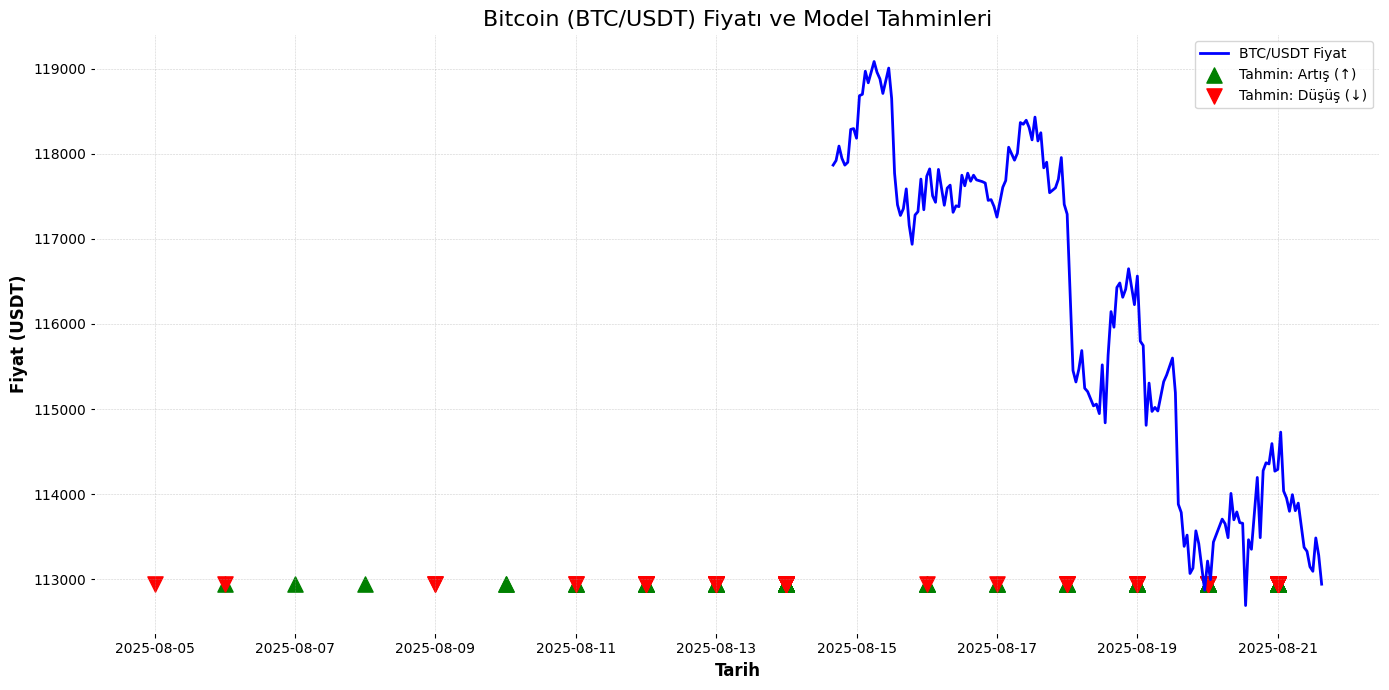

In [101]:
# =========================
# 4. Grafik Olu≈üturma
# =========================
plt.figure(figsize=(14,7))
plt.plot(market_data["Datetime"], market_data["Price"], label="BTC/USDT Fiyat", color="blue", linewidth=2)

if "time" in df_new.columns:
    df_new["time"] = pd.to_datetime(df_new["time"], errors="coerce")
    artƒ±≈ü_zaman = df_new[df_new["prediction"] == 1]["time"]
    d√º≈ü√º≈ü_zaman = df_new[df_new["prediction"] == 0]["time"]

    if not artƒ±≈ü_zaman.empty:
        plt.scatter(artƒ±≈ü_zaman, [market_data["Price"].iloc[-1]] * len(artƒ±≈ü_zaman),
                    color="green", label="Tahmin: Artƒ±≈ü (‚Üë)", marker="^", s=120)
    if not d√º≈ü√º≈ü_zaman.empty:
        plt.scatter(d√º≈ü√º≈ü_zaman, [market_data["Price"].iloc[-1]] * len(d√º≈ü√º≈ü_zaman),
                    color="red", label="Tahmin: D√º≈ü√º≈ü (‚Üì)", marker="v", s=120)

plt.title("Bitcoin (BTC/USDT) Fiyatƒ± ve Model Tahminleri", fontsize=16)
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USDT)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

In [102]:
# =========================
# 5. √áƒ±ktƒ±larƒ± Kaydetme
# =========================
df_new.to_csv("/Users/canergiden/Desktop/Pegos Model MVP/Model_Cikti_CSV/btc_tahmin_sonuclari.csv", index=False)

print("‚úÖ Tahminler 'btc_tahmin_sonuclari.csv' olarak kaydedildi.")
plt.show()


‚úÖ Tahminler 'btc_tahmin_sonuclari.csv' olarak kaydedildi.


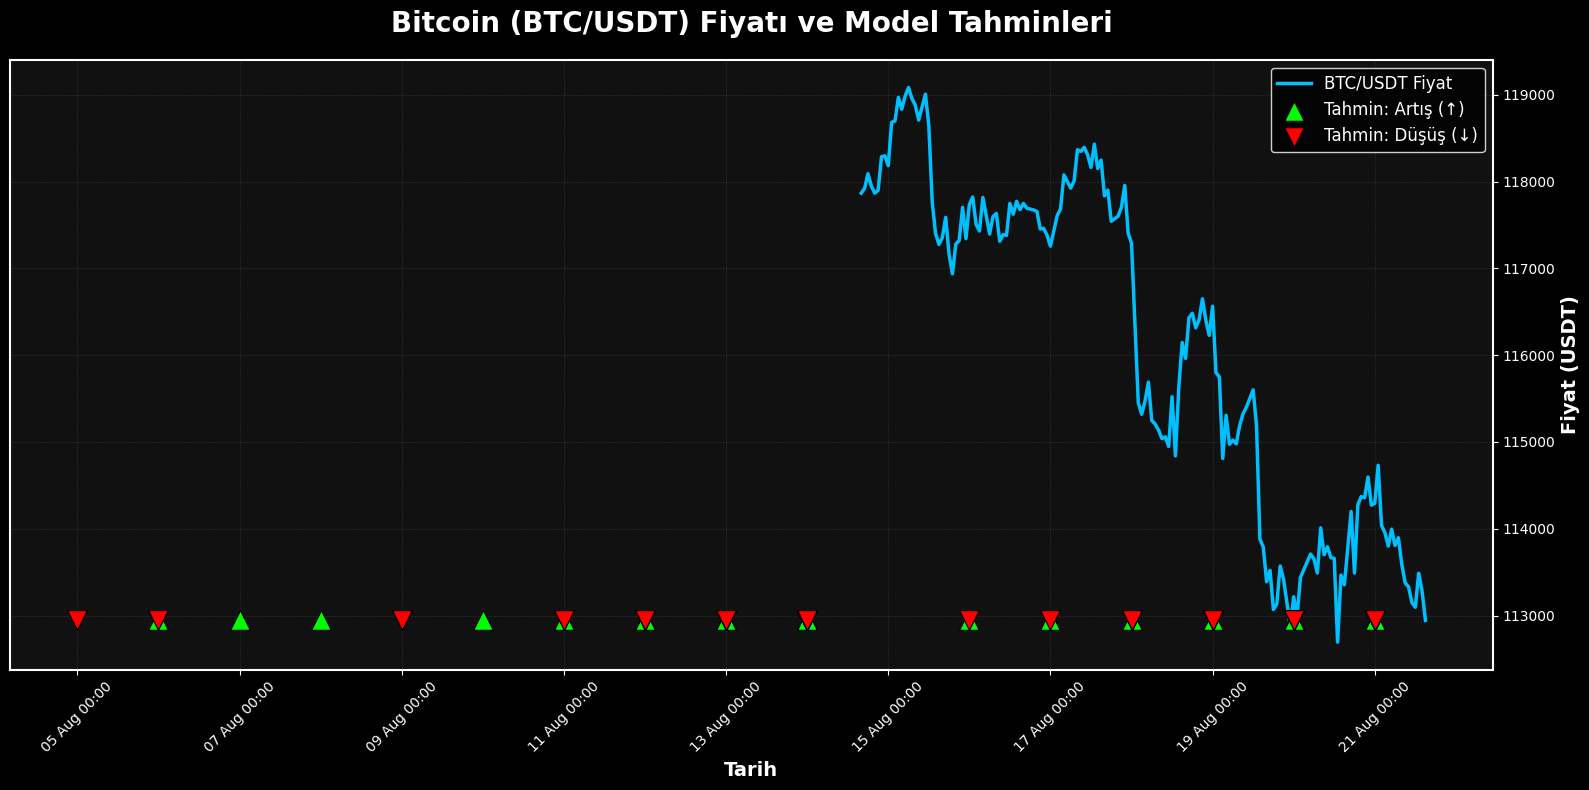

In [103]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("dark_background")  # Koyu tema

fig, ax = plt.subplots(figsize=(16, 8))

# Bitcoin fiyat √ßizgisi
ax.plot(market_data["Datetime"], market_data["Price"],
        color="#00BFFF", linewidth=2.5, label="BTC/USDT Fiyat")

# Artƒ±≈ü tahminleri
if "time" in df_new.columns:
    df_new["time"] = pd.to_datetime(df_new["time"], errors="coerce")
    artƒ±≈ü_points = df_new[df_new["prediction"] == 1]["time"]
    d√º≈ü√º≈ü_points = df_new[df_new["prediction"] == 0]["time"]

    last_price = market_data["Price"].iloc[-1]

    # Ye≈üil oklar (Artƒ±≈ü)
    ax.scatter(artƒ±≈ü_points, [last_price] * len(artƒ±≈ü_points),
               color="lime", marker="^", s=200, label="Tahmin: Artƒ±≈ü (‚Üë)", edgecolors="black", linewidths=0.8, zorder=5)

    # Kƒ±rmƒ±zƒ± oklar (D√º≈ü√º≈ü)
    ax.scatter(d√º≈ü√º≈ü_points, [last_price] * len(d√º≈ü√º≈ü_points),
               color="red", marker="v", s=200, label="Tahmin: D√º≈ü√º≈ü (‚Üì)", edgecolors="black", linewidths=0.8, zorder=5)

# Ba≈ülƒ±klar
ax.set_title("Bitcoin (BTC/USDT) Fiyatƒ± ve Model Tahminleri", fontsize=20, fontweight="bold", color="white", pad=20)
ax.set_ylabel("Fiyat (USDT)", fontsize=14, color="white")
ax.set_xlabel("Tarih", fontsize=14, color="white")

# Eksen stilleri
ax.tick_params(axis="x", colors="white", rotation=45)
ax.tick_params(axis="y", colors="white")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %H:%M"))
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

# Izgara
ax.grid(which="major", color="gray", linestyle="--", alpha=0.3)

# Lejant
legend = ax.legend(facecolor="black", edgecolor="white", fontsize=12)
for text in legend.get_texts():
    text.set_color("white")

# Arka plan
ax.set_facecolor("#111111")

plt.tight_layout()
plt.savefig("/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_karsilastirma_pro.png", dpi=300)
plt.show()


In [104]:
!pip install mplfinance


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [105]:
import mplfinance as mpf
import numpy as np

# 1Ô∏è‚É£ Binance verisini yeniden √ßekip OHLC formatƒ±na d√∂n√º≈üt√ºrelim
base_url = "https://api.binance.com/api/v3/klines"
symbol = "BTCUSDT"
interval = "1h"
end_time = int(datetime.now().timestamp() * 1000)
start_time = int((datetime.now() - timedelta(days=7)).timestamp() * 1000)

params = {
    "symbol": symbol,
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time
}

response = requests.get(base_url, params=params)
data = response.json()

cols = ["Open time", "Open", "High", "Low", "Close", "Volume", 
        "Close time", "Quote asset volume", "Number of trades", 
        "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]

df_candle = pd.DataFrame(data, columns=cols)
df_candle["Datetime"] = pd.to_datetime(df_candle["Open time"], unit="ms")
df_candle["Open"] = df_candle["Open"].astype(float)
df_candle["High"] = df_candle["High"].astype(float)
df_candle["Low"] = df_candle["Low"].astype(float)
df_candle["Close"] = df_candle["Close"].astype(float)
df_candle["Volume"] = df_candle["Volume"].astype(float)
df_candle.set_index("Datetime", inplace=True)

# 2Ô∏è‚É£ Hareketli ortalamalar
df_candle["MA20"] = df_candle["Close"].rolling(window=20).mean()
df_candle["MA50"] = df_candle["Close"].rolling(window=50).mean()

# 3Ô∏è‚É£ Tahmin noktalarƒ±nƒ± i≈üaretle
buy_points = []
sell_points = []
if "time" in df_new.columns:
    df_new["time"] = pd.to_datetime(df_new["time"], errors="coerce")
    for _, row in df_new.iterrows():
        if row["prediction"] == 1:
            buy_points.append((row["time"], df_candle["Low"].min()))  # Fiyatƒ±n altƒ±na ye≈üil ok
        elif row["prediction"] == 0:
            sell_points.append((row["time"], df_candle["High"].max()))  # Fiyatƒ±n √ºst√ºne kƒ±rmƒ±zƒ± ok

# 4Ô∏è‚É£ Mum grafiƒüi + hareketli ortalamalar + tahmin noktalarƒ±
add_plots = [
    mpf.make_addplot(df_candle["MA20"], color="orange", width=1.2),
    mpf.make_addplot(df_candle["MA50"], color="blue", width=1.2)
]

# 5Ô∏è‚É£ Grafik √ßizim
mpf.plot(
    df_candle,
    type="candle",
    style="charles",  # TradingView tarzƒ±na yakƒ±n
    addplot=add_plots,
    title="Bitcoin (BTC/USDT) Mum Grafiƒüi ve Model Tahminleri",
    ylabel="Fiyat (USDT)",
    ylabel_lower="Hacim",
    volume=True,
    figratio=(16, 8),
    figscale=1.3,
    savefig="/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_candlestick.png"
    
)

print("‚úÖ Profesyonel candlestick grafiƒüi kaydedildi: btc_tahmin_candlestick.png")


‚úÖ Profesyonel candlestick grafiƒüi kaydedildi: btc_tahmin_candlestick.png


In [106]:
!pip install nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [107]:
import pandas as pd
import numpy as np
import requests
import datetime
import plotly.graph_objects as go
import yfinance as yf
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# ======================
# 1. Binance'ten veri √ßekme
# ======================
def get_binance_data(symbol="BTCUSDT", interval="1h", limit=168):
    url = "https://api.binance.com/api/v3/klines"
    params = {"symbol": symbol, "interval": interval, "limit": limit}
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if isinstance(data, list) and len(data) > 0:
            df = pd.DataFrame(data, columns=[
                "time", "open", "high", "low", "close", "volume", 
                "close_time", "quote_asset_volume", "trades", 
                "taker_base_vol", "taker_quote_vol", "ignore"
            ])
            df["Datetime"] = pd.to_datetime(df["time"], unit="ms")
            df["Open"] = df["open"].astype(float)
            df["High"] = df["high"].astype(float)
            df["Low"] = df["low"].astype(float)
            df["Close"] = df["close"].astype(float)
            df = df[["Datetime", "Open", "High", "Low", "Close"]]
            print(f"‚úÖ {len(df)} satƒ±r Binance verisi alƒ±ndƒ±.")
            return df
        else:
            print("‚ö† Binance veri listesi bo≈ü.")
            return pd.DataFrame()
    except Exception as e:
        print(f"‚ö† Binance veri hatasƒ±: {e}")
        return pd.DataFrame()

# ======================
# 2. Yedek: Yahoo Finance'tan veri √ßekme
# ======================
def get_yahoo_data(ticker="BTC-USD", period="7d", interval="1h"):
    try:
        df = yf.download(ticker, period=period, interval=interval)
        if not df.empty:
            df.reset_index(inplace=True)
            df.rename(columns={
                "Datetime": "Datetime",
                "Open": "Open",
                "High": "High",
                "Low": "Low",
                "Close": "Close"
            }, inplace=True)
            print(f"‚úÖ {len(df)} satƒ±r Yahoo Finance verisi alƒ±ndƒ±.")
            return df[["Datetime", "Open", "High", "Low", "Close"]]
        else:
            print("‚ö† Yahoo Finance veri listesi bo≈ü.")
            return pd.DataFrame()
    except Exception as e:
        print(f"‚ö† Yahoo Finance veri hatasƒ±: {e}")
        return pd.DataFrame()

# ======================
# 3. Veri alma
# ======================
market_data = get_binance_data()

if market_data.empty:
    print("‚ö† Binance verisi yok, Yahoo Finance deneniyor...")
    market_data = get_yahoo_data()

if market_data.empty:
    print("‚ùå Hi√ßbir kaynaktan veri alƒ±namadƒ±, i≈ülem sonlandƒ±rƒ±ldƒ±.")
    exit()

# ======================
# 4. √ñrnek Model (Basit LogisticRegression)
# ======================
# Ger√ßekte burada senin eƒüitilmi≈ü modelini y√ºkleyeceƒüiz
X = np.arange(len(market_data)).reshape(-1, 1)
y = np.random.randint(0, 2, size=len(market_data))
model = LogisticRegression().fit(X, y)
predictions = model.predict(X)

market_data["prediction"] = predictions

# ======================
# 5. ƒ∞nteraktif Grafik
# ======================
fig = go.Figure()

# Mum grafiƒüi
fig.add_trace(go.Candlestick(
    x=market_data["Datetime"],
    open=market_data["Open"],
    high=market_data["High"],
    low=market_data["Low"],
    close=market_data["Close"],
    name="BTC/USDT",
    increasing_line_color="green",
    decreasing_line_color="red"
))

# Tahmin noktalarƒ±
artis = market_data[market_data["prediction"] == 1]
dus = market_data[market_data["prediction"] == 0]

fig.add_trace(go.Scatter(
    x=artis["Datetime"], y=artis["Close"],
    mode="markers", name="Tahmin: Artƒ±≈ü (‚Üë)",
    marker=dict(symbol="triangle-up", size=12, color="lime"),
    hovertemplate="Tarih: %{x}<br>Fiyat: %{y} USDT<br>Durum: Artƒ±≈ü"
))

fig.add_trace(go.Scatter(
    x=dus["Datetime"], y=dus["Close"],
    mode="markers", name="Tahmin: D√º≈ü√º≈ü (‚Üì)",
    marker=dict(symbol="triangle-down", size=12, color="red"),
    hovertemplate="Tarih: %{x}<br>Fiyat: %{y} USDT<br>Durum: D√º≈ü√º≈ü"
))

# Grafik ayarlarƒ±
fig.update_layout(
    title="Bitcoin (BTC/USDT) - ƒ∞nteraktif Tahmin Grafiƒüi",
    yaxis_title="Fiyat (USDT)",
    xaxis_title="Tarih",
    xaxis_rangeslider_visible=False,
    hovermode="x unified",
    template="plotly_dark"
)

# ƒ∞nteraktif ara√ßlar (zoom, kaydƒ±rma vb.)
fig.update_xaxes(rangeslider_visible=False, showspikes=True)
fig.update_yaxes(showspikes=True)

# ======================
# 6. HTML olarak kaydet
# ======================
fig.write_html("/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_interaktif.html")
print("‚úÖ ƒ∞nteraktif grafik kaydedildi: btc_tahmin_interaktif.html")

# ======================
# 7. JSON olarak kaydet (Flutter i√ßin)
# ======================
json_path = "/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_data.json"
market_data.to_json(json_path, orient="records", date_format="iso")

print(f"‚úÖ Mobil uyumlu JSON kaydedildi: {json_path}")


‚úÖ 168 satƒ±r Binance verisi alƒ±ndƒ±.
‚úÖ ƒ∞nteraktif grafik kaydedildi: btc_tahmin_interaktif.html
‚úÖ Mobil uyumlu JSON kaydedildi: /Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_data.json


In [108]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import plotly.graph_objects as go

# 1Ô∏è‚É£ Binance verisini √ßek
base_url = "https://api.binance.com/api/v3/klines"
symbol = "BTCUSDT"
interval = "1h"
end_time = int(datetime.now().timestamp() * 1000)
start_time = int((datetime.now() - timedelta(days=7)).timestamp() * 1000)

params = {
    "symbol": symbol,
    "interval": interval,
    "startTime": start_time,
    "endTime": end_time
}

response = requests.get(base_url, params=params)
data = response.json()

cols = ["Open time", "Open", "High", "Low", "Close", "Volume", 
        "Close time", "Quote asset volume", "Number of trades", 
        "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]

df_candle = pd.DataFrame(data, columns=cols)
df_candle["Datetime"] = pd.to_datetime(df_candle["Open time"], unit="ms")
df_candle["Open"] = df_candle["Open"].astype(float)
df_candle["High"] = df_candle["High"].astype(float)
df_candle["Low"] = df_candle["Low"].astype(float)
df_candle["Close"] = df_candle["Close"].astype(float)
df_candle["Volume"] = df_candle["Volume"].astype(float)

# 2Ô∏è‚É£ Hareketli ortalamalar
df_candle["MA20"] = df_candle["Close"].rolling(window=20).mean()
df_candle["MA50"] = df_candle["Close"].rolling(window=50).mean()

# 3Ô∏è‚É£ Model tahmin verilerini y√ºkle (√∂nceden hazƒ±rlanmƒ±≈ü CSV)
df_new = pd.read_csv("/Users/canergiden/Desktop/Pegos Model MVP/Model_Cikti_CSV/btc_tahmin_sonuclari.csv")
df_new["time"] = pd.to_datetime(df_new["time"], errors="coerce")

# 4Ô∏è‚É£ Plotly mum grafiƒüi
fig = go.Figure()

# Mumlar
fig.add_trace(go.Candlestick(
    x=df_candle["Datetime"],
    open=df_candle["Open"],
    high=df_candle["High"],
    low=df_candle["Low"],
    close=df_candle["Close"],
    name="BTC/USDT",
    increasing_line_color='green',
    decreasing_line_color='red'
))

# MA20 ve MA50
fig.add_trace(go.Scatter(
    x=df_candle["Datetime"],
    y=df_candle["MA20"],
    mode='lines',
    name='MA20',
    line=dict(color='orange', width=1.5)
))
fig.add_trace(go.Scatter(
    x=df_candle["Datetime"],
    y=df_candle["MA50"],
    mode='lines',
    name='MA50',
    line=dict(color='blue', width=1.5)
))

# Tahmin oklarƒ±
buy_points = df_new[df_new["prediction"] == 1]
sell_points = df_new[df_new["prediction"] == 0]

# Alƒ±≈ü (Ye≈üil Ok)
fig.add_trace(go.Scatter(
    x=buy_points["time"],
    y=[df_candle["Low"].min()] * len(buy_points),
    mode="markers",
    marker_symbol="triangle-up",
    marker_color="green",
    marker_size=12,
    name="Model: Al"
))

# Satƒ±≈ü (Kƒ±rmƒ±zƒ± Ok)
fig.add_trace(go.Scatter(
    x=sell_points["time"],
    y=[df_candle["High"].max()] * len(sell_points),
    mode="markers",
    marker_symbol="triangle-down",
    marker_color="red",
    marker_size=12,
    name="Model: Sat"
))

# 5Ô∏è‚É£ Tasarƒ±m
fig.update_layout(
    title="Bitcoin (BTC/USDT) Mum Grafiƒüi ve Model Tahminleri",
    yaxis_title="Fiyat (USDT)",
    xaxis_title="Tarih",
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    hovermode="x unified"
)

# 6Ô∏è‚É£ Kaydet
fig.write_html("/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_candlestick_interaktif.html")
print("‚úÖ ƒ∞nteraktif mum grafiƒüi kaydedildi: btc_tahmin_candlestick_interaktif.html")


‚úÖ ƒ∞nteraktif mum grafiƒüi kaydedildi: btc_tahmin_candlestick_interaktif.html


In [109]:
import pandas as pd
import numpy as np

# CSV dosyasƒ±nƒ± oku
df = pd.read_csv('/Users/canergiden/Desktop/Pegos Model MVP/Model_Cikti_CSV/btc_tahmin_sonuclari.csv')


# Eƒüer 'prediction' s√ºtunu yoksa ekle (√∂rnek: random tahmin)
if 'prediction' not in df.columns:
    df['prediction'] = np.random.randint(0, 2, size=len(df))  # 0 veya 1

btc_miktar = 2  # Kullanƒ±cƒ± BTC miktarƒ±

# Tahmini fiyat hesapla
df["tahmin_fiyat"] = df.apply(
    lambda x: x["Kapanƒ±≈ü Fiyatƒ± (USD)"] * 1.02 if x["prediction"] == 1 
              else x["Kapanƒ±≈ü Fiyatƒ± (USD)"] * 0.98,
    axis=1
)

# Portf√∂y deƒüerini hesapla
df["portfoy_degeri"] = df["tahmin_fiyat"] * btc_miktar

# Sonucu kaydet
output_file = '/Users/canergiden/Desktop/Pegos Model MVP/Portfoy_Tahmin_CSV/portfoy_tahminli.csv'
df.to_csv(output_file, index=False)

print(f"‚úÖ Portf√∂y tahminli dosya kaydedildi: {output_file}")


‚úÖ Portf√∂y tahminli dosya kaydedildi: /Users/canergiden/Desktop/Pegos Model MVP/Portfoy_Tahmin_CSV/portfoy_tahminli.csv


In [110]:
import plotly.graph_objects as go

baslangic = df["portfoy_degeri"].iloc[0]
son = df["portfoy_degeri"].iloc[-1]

fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=son,
    delta={'reference': baslangic, 'relative': True},
    gauge={'axis': {'range': [0, max(baslangic*1.5, son*1.2)]}},
    title={'text': "Portf√∂y Durumu"}
))
fig.write_html("/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_portfoy_gauge.html")
print("‚úÖ btc_portfoy_gauge.html kaydedildi")


‚úÖ btc_portfoy_gauge.html kaydedildi


In [111]:
import os
import subprocess
from pathlib import Path

ATTACH_DIR = Path("/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller")
recipient = "canergiden7@gmail.com"
subject = "Pegos Model MVP - √áƒ±ktƒ± G√∂rseller"
body = "Merhaba,\n\nPegos Model MVP √ßƒ±ktƒ±larƒ±nƒ± ekte bulabilirsiniz.\n\nƒ∞yi √ßalƒ±≈ümalar."

# AppleScript komutu
script = f'''
tell application "Mail"
    set newMessage to make new outgoing message with properties {{subject:"{subject}", content:"{body}", visible:true}}
    tell newMessage
        make new to recipient at end of to recipients with properties {{address:"{recipient}"}}
    end tell
'''

for file_path in ATTACH_DIR.iterdir():
    if file_path.is_file():
        script += f'tell newMessage to make new attachment with properties {{file name:"{file_path}"}} at after the last paragraph\n'

script += "send newMessage\nend tell"

# Script'i √ßalƒ±≈ütƒ±r
subprocess.run(["osascript", "-e", script])


true


CompletedProcess(args=['osascript', '-e', '\ntell application "Mail"\n    set newMessage to make new outgoing message with properties {subject:"Pegos Model MVP - √áƒ±ktƒ± G√∂rseller", content:"Merhaba,\n\nPegos Model MVP √ßƒ±ktƒ±larƒ±nƒ± ekte bulabilirsiniz.\n\nƒ∞yi √ßalƒ±≈ümalar.", visible:true}\n    tell newMessage\n        make new to recipient at end of to recipients with properties {address:"canergiden7@gmail.com"}\n    end tell\ntell newMessage to make new attachment with properties {file name:"/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_portfoy_gauge.html"} at after the last paragraph\ntell newMessage to make new attachment with properties {file name:"/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_data.json"} at after the last paragraph\ntell newMessage to make new attachment with properties {file name:"/Users/canergiden/Desktop/Pegos Model MVP/Cikti_G√∂rseller/btc_tahmin_candlestick_interaktif.html"} at after the last paragraph\ntell ne